<a href="https://colab.research.google.com/github/mrunal0502/IOT-based-Patient-Health-Monitoring-System/blob/main/Copy_of_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mrunal Rawade**

In [ ]:
import numpy as np
import pandas as pd
import plotly.figure_factory as ff

In [ ]:
import os
for dirname, _, filesname in os.walk('/kaggle/input'):
    for filesname in filesnames:
        print(os.path.join(dirname,filename))

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.shape)
print(df_train.shape)

(8191, 4)
(8191, 4)


In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import string
from collections import Counter 

In [ ]:
import plotly.express as px

In [ ]:
from nltk.corpus import stopwords
import spacy

In [ ]:
df_train.dropna(inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8189 entries, 0 to 8189
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         8189 non-null   object
 1   text           8189 non-null   object
 2   selected_text  8189 non-null   object
 3   sentiment      8189 non-null   object
dtypes: object(4)
memory usage: 319.9+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


## **Exploratory Data Analysis**

In [ ]:
df_train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
df_train.tail()

,textID,text,selected_text,sentiment
8185,a5ab0d4fc5,HAHAHAHA...yeah you mess up that crossing and...,mess,negative
8186,6e1e864851,Cleaned out me Followers List and blocked the ...,spammer,negative
8187,09b19e96f2,I had one of those in south Florida. Mowing a...,I had one of those in south Florida. Mowing ar...,neutral
8188,44a1d81a8f,I would advise watching it in the cinema. I a...,I am sure the effects are worth it.,positive
8189,eda7c8ba8f,This is dumb. I keep losing followers!,This is dumb. I keep losing followers!,negative


In [ ]:
temp = df_train.groupby('sentiment').count()['text'].reset_index().sort_values(by='text', ascending=False)
temp

,sentiment,text
1,neutral,3305
2,positive,2613
0,negative,2271


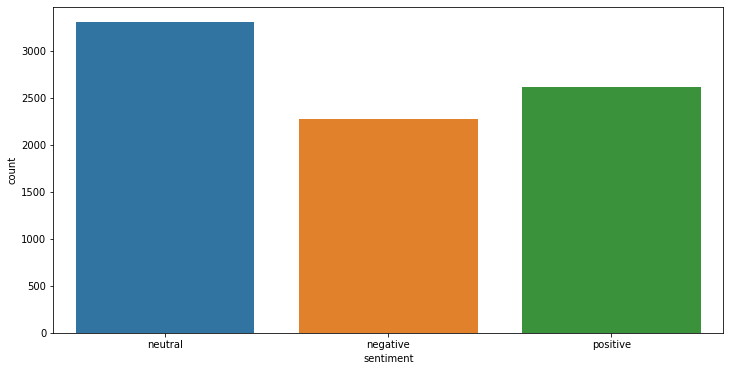

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment', data=df_train)

In [ ]:
def jaccard(str1, str2):
  a = set(str1.lower().split())
  b = set(str2.lower().split())
  c = a.intersection(b)
  return float(len(c)/len(a) + len(b)-len(c))
  


In [ ]:
results_jaccard =[]
for ind, row in df_train.iterrows():
    sent1 = row.text
    sent2 = row.selected_text

jaccard_score = jaccard(sent1, sent2)
results_jaccard.append([sent1,sent2,jaccard_score])

In [ ]:
df_jaccard = pd.DataFrame(results_jaccard, columns=['text','selected_text','jaccard_score'])
df_train = df_train.merge(df_jaccard,how='outer')

In [ ]:
df_train['Num_words_ST']=df_train['selected_text'].apply(lambda x:len(str(x).split()))

df_train['Num_words_Text']=df_train['text'].apply(lambda x:len(str(x).split()))

df_train['difference_in_words']=df_train['Num_words_Text'] - df_train['Num_words_ST']

In [ ]:
df_train.head()

,textID,text,selected_text,sentiment,jaccard_score,Num_words_ST,Num_words_Text,difference_in_words
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,NaN,7,7,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,NaN,2,10,8
2,088c60f138,my boss is bullying me...,bullying me,negative,NaN,2,5,3
3,9642c003ef,what interview! leave me alone,leave me alone,negative,NaN,3,5,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,NaN,3,14,11


In [ ]:
hist_data = [df_train['Num_words_ST'], df_train['Num_words_Text']]
group_labels = ['Selected_Text', 'Text']

fig = ff.create_distplot(hist_data, group_labels, show_curve=False)
fig.update_layout(title_text='Distribution of Number of words')
fig.update_layout(
                  autosize=False,
                  width=900,
                  height=700
                  )

fig.show()